# MA124 Maths by Computer: Assignment 3 
## Part B: Geometric Brownian Motion

Student number: 2106983

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

We consider numerical simulations of the stochastic differential equation for Geometric Brownian Motion given by 

$$
\dot S(t) = \mu S(t) + \sigma S(t) \xi(t)
$$

This equations models Geometric Brownian Motion and can be used to represent the growth of a stock price, $S(t)$.

$S(t)$ is taken to be positive and represents the value of a stock at time $t$ and the second term in the equation describes the fluctuations in the value of a stock and notice it contains $S(t)$ itself. This is equivalent to the fact that fluctuations in a stock price are proportional to the price.

The other notable variables are:

Time $t$ measured in years

$\mu$ - growth rate where $\mu$>0, typical values between 0.01 and 0.1 which corresponds to 1% and 10% annual growth (non-compounded). In my case it will be 0.07.

$\sigma$ - volatility where $\sigma$>0, assumed to be between 0.1 and 0.4. In my case it will be 0.24.

$\xi$(t) - Gaussian random variable.


In [2]:
# Define a function that solves SDEs of this form
def SDE_GBM(S0, tf, mu, sigma, Npaths):
    '''returns time and solution "S" for given arguments'''
    Nsteps=365*tf

# Generate the time grid and solution array
    t, dt = np.linspace(0,tf,Nsteps+1,retstep=True)
    S = np.zeros((Nsteps+1,Npaths))
    root_dt = np.sqrt(dt)
      
# Time step starting from initial condition
    S[0,:] = S0;
    for n in range(Nsteps):
        F_of_X = mu*S[n,:]
        S[n+1,:] =  S[n,:] + dt * F_of_X + sigma *  S[n,:]* root_dt * np.random.randn(Npaths)
    return t, S

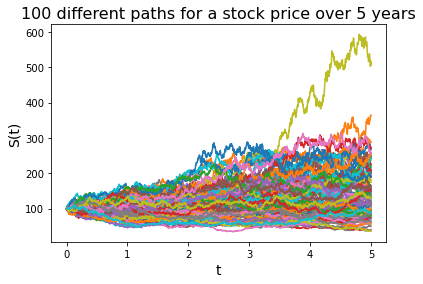

In [3]:
# Set parameters
tf=5
mu=0.07
sigma=0.24
S0=100
Npaths=100

# extract t and S from our function with Npaths=100
t, S= (SDE_GBM(S0, tf, mu, sigma, Npaths))

# plot paths all on the same graph
plt.plot(t, S)
plt.xlabel("t", fontsize=14)
plt.ylabel("S(t)", fontsize=14)
plt.title("100 different paths for a stock price over 5 years", fontsize=16)
plt.show()

This plot shows all the different paths possible. Note (for later) that the bulk of the paths are wholly contained in the bottom half of the plot and as you look at larger stock prices the density of the lines decreases - aka there are less paths reaching higher prices. This is further accentuated by the outliers being the stocks that reach and fluctuate around the highest prices - the "top" paths.

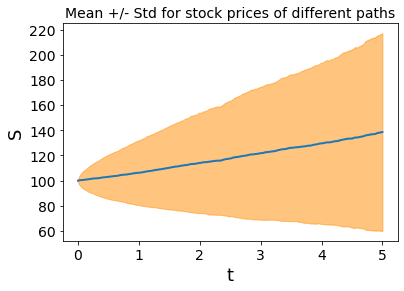

In [4]:
# again extract t and s with the same arguments expect Npaths which is now 2000
Npaths=2000
t, S= (SDE_GBM(S0, tf, mu, sigma, Npaths))

# plot the mean +/- standard deviation as function of time.

# Compute the mean and standard deviation as function of time
S_mean = np.mean(S,1)
S_std = np.std(S,1)

# Plot shaded region between X_mean - X_std and X_mean + X_std 
plt.fill_between(t, 
                 S_mean - S_std, 
                 S_mean + S_std, 
                 alpha=0.5, color="darkorange")

# Plot the mean itself
plt.plot(t,S_mean, linewidth=2)

# labels
plt.xlabel("t", fontsize=18)
plt.ylabel("S", fontsize=18)
plt.title("Mean +/- Std for stock prices of different paths", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

This plot shows the steadily increasing mean over time. It is also a good way of showing that as time goes on the standard deviation gets larger and the "spread" from the mean is larger, which makes a 2D cone sort of shape.

In [6]:
def normal_mean(t):
    return np.log(S0) + mu*t - 0.5*(sigma**2)*t

def normal_std(t):
    return sigma*np.sqrt(t)

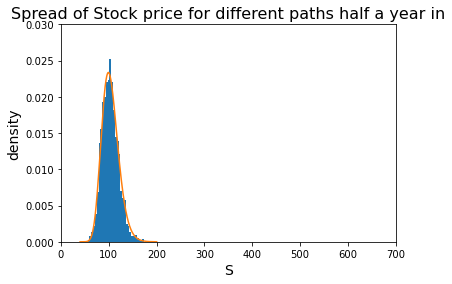

The mean half a year in is 103.03979595707598
The standard deviation half a year in is 17.483326399790343



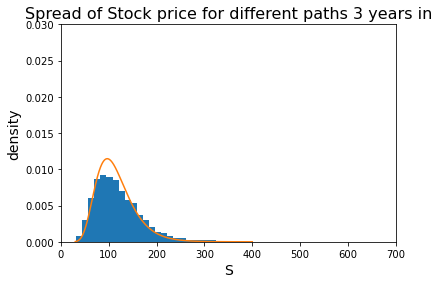

The mean 3 years in is 121.79061953679364
The standard deviation 3 years in is 52.78653207603197



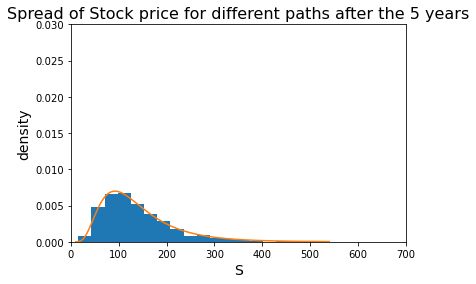

The mean after 5 years is 138.62524631345877
The standard deviation after 5 years is 78.48193739581207


In [7]:
# Plot histograms showing the spread of the price of different paths at separate times

# Plot first histogram half a year in
plt.hist(S[182,:], bins=31, density=True)
plt.xlim(0,700)
plt.ylim(0,0.03)
plt.xlabel("S",fontsize=14)
plt.ylabel("density",fontsize=14)
plt.title("Spread of Stock price for different paths half a year in", fontsize=16)

# Plot lognormal distribution on same plot, with the shape, loc and scale computed half a year in
x=np.linspace(40,200,1001)
y = lognorm.pdf(x, normal_std(0.5), scale=np.exp(normal_mean(0.5)))
plt.plot(x,y)
plt.show()

# Print mean and standard deviation
print("The mean half a year in is",np.mean(S[182,:]))
print("The standard deviation half a year in is",np.std(S[182,:]))
print()

# Plot second histogram 3 years in
plt.hist(S[1095,:], bins=31, density=True)
plt.xlim(0,700)
plt.ylim(0,0.03)
plt.xlabel("S",fontsize=14)
plt.ylabel("density",fontsize=14)
plt.title("Spread of Stock price for different paths 3 years in", fontsize=16)

# Plot lognormal distribution on same plot, with the shape, loc and scale computed 3 years in
x=np.linspace(30,400,1001)
y = lognorm.pdf(x, normal_std(2), scale=np.exp(normal_mean(2)))
plt.plot(x,y)
plt.show()

# Print mean and standard deviation
print("The mean 3 years in is",np.mean(S[1095,:]))
print("The standard deviation 3 years in is",np.std(S[1095,:]))
print()

# Plot final histogram at the end of the 5 years
plt.hist(S[-1,:], bins=31, density=True)
plt.xlim(0,700)
plt.ylim(0,0.03)
plt.xlabel("S",fontsize=14)
plt.ylabel("density",fontsize=14)
plt.title("Spread of Stock price for different paths after the 5 years", fontsize=16)

# Plot lognormal distribution on same plot, with the shape, loc and scale computed after 5 years
x=np.linspace(10,540,1001)
y = lognorm.pdf(x, normal_std(5), scale=np.exp(normal_mean(5)))
plt.plot(x,y)
plt.show()

# Print mean and standard deviation
print("The mean after 5 years is",np.mean(S[-1,:]))
print("The standard deviation after 5 years is",np.std(S[-1,:]))

## Interpretation of plots:

It is clear to see that as time goes on the mean stock price steadily increases (almost proportionally to time) - this is reflective of the real world situation we have modelled as the kinds of stocks we have based our model on will generally increase due to the constant positive growth rate and relatively low volatility. 

It is also interesting to note that the "left" hand sides of the histograms (to the left of the mean) contain more data, indicating that where stocks vary a higher quantity have  value less than the mean. This is equivalent to the median being less than the mean, and means on average stocks are more likely to have less value than the mean due to the volatility and gaussian random variable we introduce in our model.

The mean of the distribution shown in the pretty plot is $S_0 \exp(\mu t)$, to within the accuracy of the numerical solution. The financial interpretation is that the mean grows at rate $\mu$, exactly as it would for the ODE, $\dot S = \mu S$, in other words, the mean grows as if the money were invested in a compound interest rate of $\mu$. It is visually clear from the skew in the log-normal distributions that the mean is above the median, but a more precise statement is that the mean is above the median by the factor $\sigma^2/2$, due to Ito's lemma, that comes about by the change of variables from $S$ to $\log S$. Students are not expected to have fully understood this point.  

This challenge material is very difficult, so congratulations to all those who got it even approximately correct!